# Salary Prediction EDA

### Three CSV files are provided for this project, including: train_features, train_salaries and test_features. lets load the data and print the information


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_80237070f84c4592a725b078f75e4bb1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='INJ1IE7wWQ699XacfuNIsLssFs7vbYUE0c9ZryA0Q9Ft',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_80237070f84c4592a725b078f75e4bb1.get_object(Bucket='salaryprediction-donotdelete-pr-dvuenivrcu5b5m',Key='test_features.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
test_feature_df = pd.read_csv(body)

body = client_80237070f84c4592a725b078f75e4bb1.get_object(Bucket='salaryprediction-donotdelete-pr-dvuenivrcu5b5m',Key='train_features.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
train_feature_df = pd.read_csv(body)

body = client_80237070f84c4592a725b078f75e4bb1.get_object(Bucket='salaryprediction-donotdelete-pr-dvuenivrcu5b5m',Key='train_salaries.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
train_salary_df = pd.read_csv(body)


In [3]:
train_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_salary_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
test_feature_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### Now we can examin the data and check for duplicates

1. Train feature dataset

In [6]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_feature_df.duplicated().sum()

0

2. Train salary dataset

In [8]:
train_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [9]:
train_salary_df.duplicated().sum()

0

3. Test feature dataset

In [10]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
test_feature_df.duplicated().sum()

0

### Now we can identify the numerical and categorical variables for further analysis

In [12]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
categorical_vars = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']
target_var = 'salary'

In [14]:
train_feature_df.describe(include= "all")

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN
top,JOB1362684642133,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000


### From table above we can see the "jobId" is unique, therefore it can be used as the unique identifier. 
### Now let's merge the training features and targets into one dataframe

In [15]:
train_df = pd.merge(train_feature_df, train_salary_df, on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### Let's plot the salary data for better understanding before evaluation.

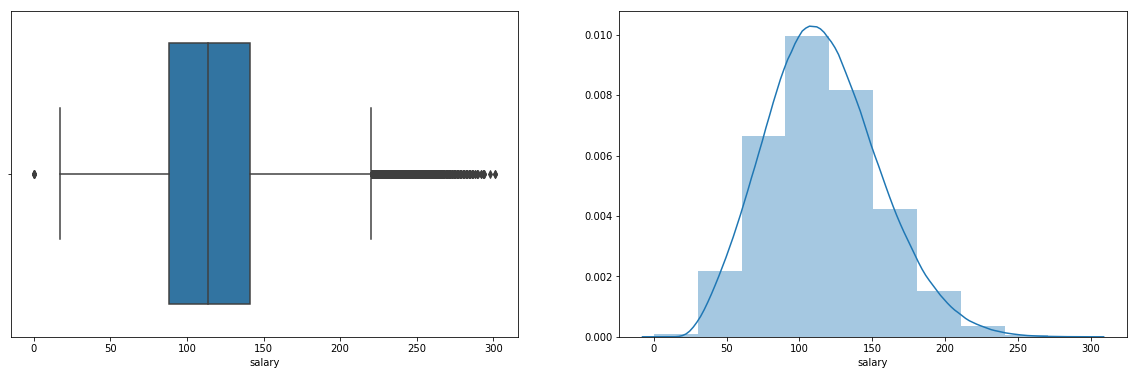

In [17]:
plt.figure(figsize = (20, 6))
ax0 = plt.subplot(1,2,1)
sns.boxplot(train_df.salary, ax=ax0)
ax1 = plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=10, ax=ax1)
plt.show()

In [18]:
stat = train_df.salary.describe()
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

The upper and lower bounds for suspected outliers are 220.5 and 8.5.


### Now we cam examine the potential outliers based on upper and lower bounds

In [19]:
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [20]:
train_df.loc[train_df.salary < 8.5, 'jobType'].value_counts()

JUNIOR            2
MANAGER           1
CTO               1
VICE_PRESIDENT    1
Name: jobType, dtype: int64

### This data shows that there are quiet a few junior level jobs with salaries higher than 222.5 and few high level jobs with salaries lower than 8.5!
### So, let's have a closer look at the data:

In [21]:
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


In [22]:
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


### We can see that Junior roles with high salaries are mostly in industries with higher pay range and they seem to have high level of educations (Masters and Doctoral). 
### Therefore we can keep this data, however there a few jobs with "Zero" salary that don't seem to be right. So we can remove them from the dataset.

In [23]:
train_df = train_df[train_df.salary > 8.5]

### Now we can investigate the effect of each attribute on the target value 'Salary'.

* Company Id vs Salary:

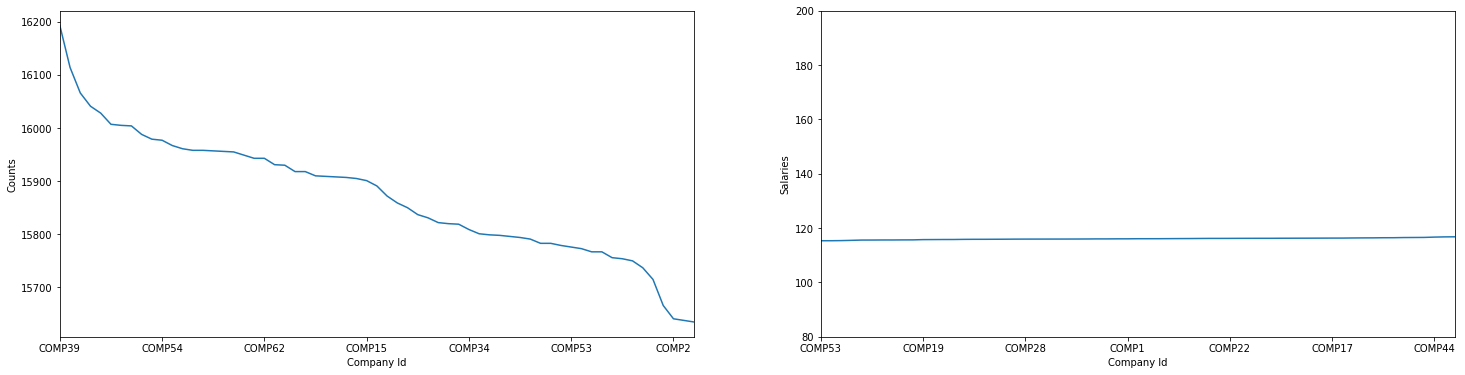

In [24]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
mean = train_df.groupby('companyId')['salary'].mean()
train_df['companyId'] = train_df['companyId'].astype('category')
levels = mean.sort_values().index.tolist()
train_df['companyId'].cat.reorder_categories(levels, inplace=True)
train_df['companyId'].value_counts().plot()
plt.xlabel('Company Id')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mean = train_df.groupby('companyId')['salary'].mean()
mean.plot()
plt.ylim(80, 200) 
plt.ylabel('Salaries')
plt.xlabel('Company Id')
plt.show()

* Job Type vs Salary:

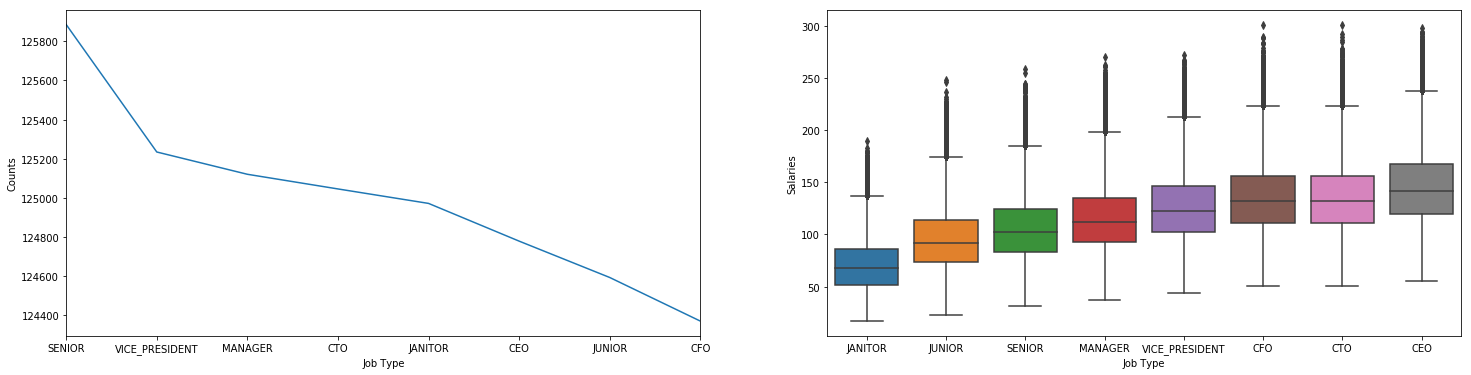

In [25]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
mean = train_df.groupby('jobType')['salary'].mean()
train_df['jobType'] = train_df['jobType'].astype('category')
levels = mean.sort_values().index.tolist()
train_df['jobType'].cat.reorder_categories(levels, inplace=True)
train_df['jobType'].value_counts().plot()
plt.xlabel('Job Type')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'jobType', y = 'salary', data=train_df)
plt.ylabel('Salaries')
plt.xlabel('Job Type')
plt.show()

* Degree Level vs Salary:

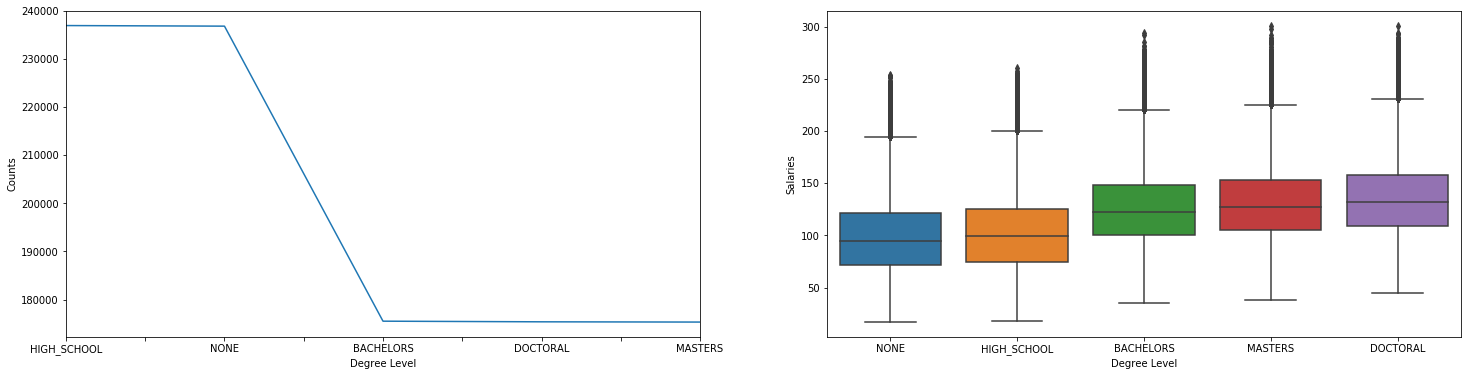

In [26]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
mean = train_df.groupby('degree')['salary'].mean()
train_df['degree'] = train_df['degree'].astype('category')
levels = mean.sort_values().index.tolist()
train_df['degree'].cat.reorder_categories(levels, inplace=True)
train_df['degree'].value_counts().plot()
plt.xlabel('Degree Level')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'degree', y = 'salary', data=train_df)
plt.ylabel('Salaries')
plt.xlabel('Degree Level')
plt.show()

* Type of Major vs Salary:

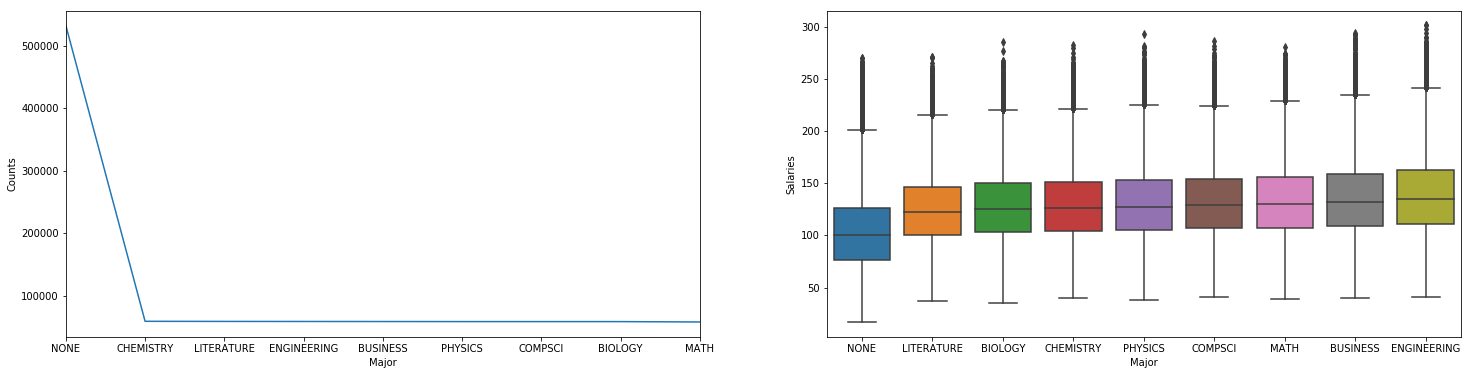

In [27]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
mean = train_df.groupby('major')['salary'].mean()
train_df['major'] = train_df['major'].astype('category')
levels = mean.sort_values().index.tolist()
train_df['major'].cat.reorder_categories(levels, inplace=True)
train_df['major'].value_counts().plot()
plt.xlabel('Major')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'major', y = 'salary', data=train_df)
plt.ylabel('Salaries')
plt.xlabel('Major')
plt.show()

* Type of Industry vs Salary:

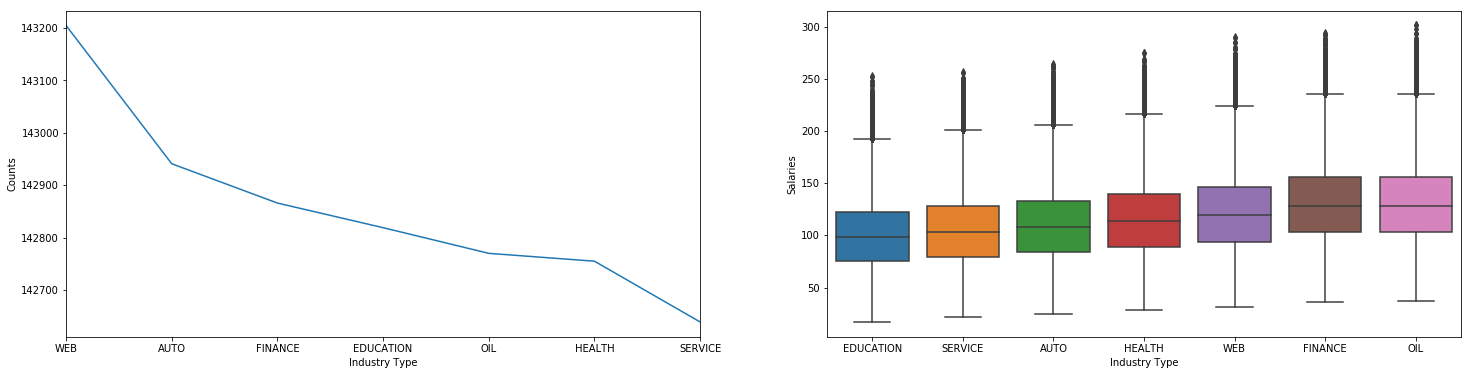

In [28]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
mean = train_df.groupby('industry')['salary'].mean()
train_df['industry'] = train_df['industry'].astype('category')
levels = mean.sort_values().index.tolist()
train_df['industry'].cat.reorder_categories(levels, inplace=True)
train_df['industry'].value_counts().plot()
plt.xlabel('Industry Type')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
sns.boxplot(x = 'industry', y = 'salary', data=train_df)
plt.ylabel('Salaries')
plt.xlabel('Industry Type')
plt.show()

* Years of Experience vs Salary:

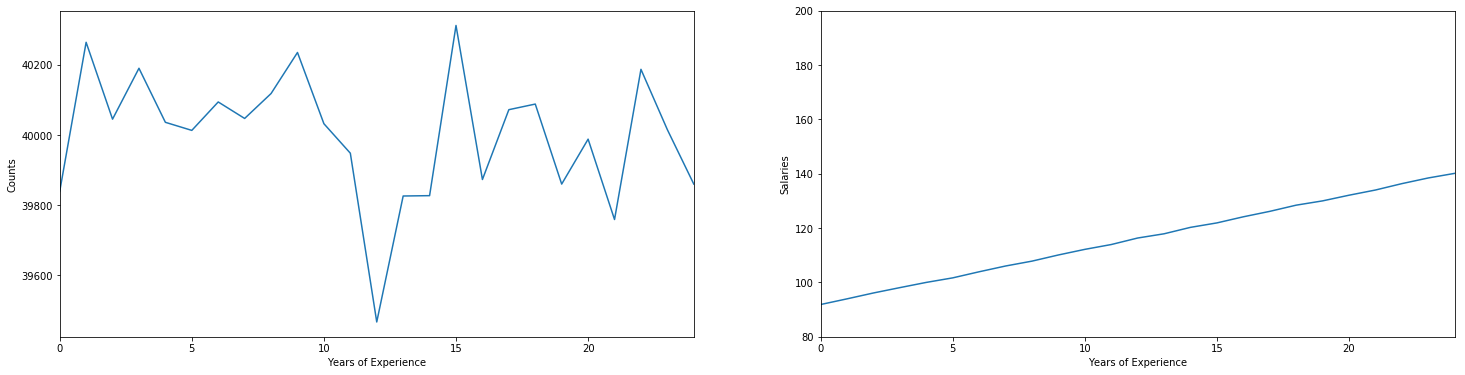

In [29]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
train_df['yearsExperience'].value_counts().sort_index().plot()
plt.xlabel('Years of Experience')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mean = train_df.groupby('yearsExperience')['salary'].mean()
mean.plot()
plt.ylim(80, 200) 
plt.ylabel('Salaries')
plt.xlabel('Years of Experience')
plt.show()

* Distance from Metropolis vs Salary:

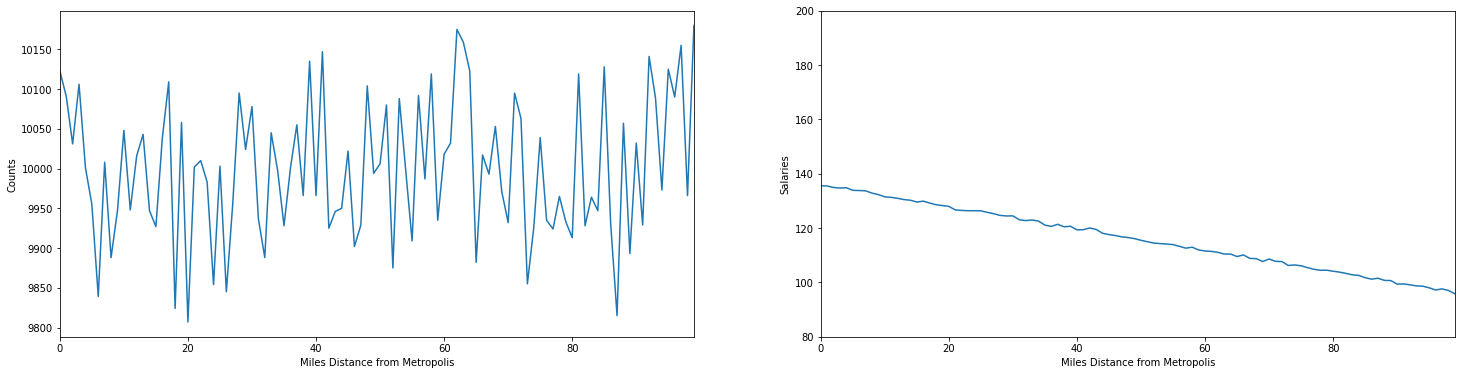

In [30]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
train_df['milesFromMetropolis'].value_counts().sort_index().plot()
plt.xlabel('Miles Distance from Metropolis')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mean = train_df.groupby('milesFromMetropolis')['salary'].mean()
mean.plot()
plt.ylim(80, 200) 
plt.ylabel('Salaries')
plt.xlabel('Miles Distance from Metropolis')
plt.show()

### From figures above we conclude that:
+ Company Id has little to no effect on the salary.
+ The higher the job type in company's hierarchy, higher the salary.
+ There are less number of jobs with advanced degree, but level of education has a positive relationship with salary.
+ Business and Engineering majors tend to have higher salaries.
+ Salaries in Oil and Finance industry are comparitively higher.
+ Salaries tend to increase with years of experience.
+ Salaries have negative relationships with distance from metropolis.

# Modeling

### Now we can start to build and test some predictive models using training set and then make salary predictions on test set using the best model.
### First, we need to prepare the data for modeling, i.e. shuffle, re-index and convert categorical variables.

In [31]:
#shuffle, and reindex training data. shuffling improves cross-validation accuracy.
clean_train_df = shuffle(train_df).reset_index()

In [32]:
#here we do one-hot encoding on categorical variables and combine result with continous variables.

#this allows the representation of categorical data to be more expressive (training set).
feature = pd.get_dummies(clean_train_df[['companyId', 'jobType', 'degree', 'major', 'industry']])

In [33]:
#encode categorical data and get final test dfs
feature_test = pd.get_dummies(test_feature_df[['companyId', 'jobType', 'degree', 'major', 'industry']])

In [34]:
num_df = clean_train_df[numeric_vars].apply(pd.to_numeric)
num_df_test = test_feature_df[numeric_vars].apply(pd.to_numeric)

In [35]:
#final feature df
feature_df = pd.concat([feature, num_df], axis=1)

In [36]:
#final test df
test_df = pd.concat([feature_test, num_df_test], axis=1)

In [37]:
#final target df
target_df = clean_train_df[target_var]

### We are using Linear Regression, Pipelines, Random Forest and Gradient Boosting Regressor on training set, and perform cross-validation.
### Using MSE as the evaluation metrics, the model with lowest value is chosen as the predictive model for the test set. 

In [38]:
#these functions help in model evaluation
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)

def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

#saves model, model summary, feature importances, and predictions.
def save_results(model, mean_mse, predictions, feature_importances):
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')

In [39]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#define number of processes to run in parallel
num_procs = 2

#shared model paramaters
verbose_lvl = 0

In [40]:
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                           max_features=30, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)
                      
models.extend([lr, lr_std_pca, rf, gbm])

#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Average MSE:
 384.4538117003742
Standard deviation during CV:
 0.9914099990666898

Model:
 Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Average MSE:
 384.45335333388994
Standard deviation during CV:
 0.9896503807484294

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=2, oob_score=False, random_state=None

### Based on the results obove, Gradient Boosting Regressor has the lowest MSE value and will be used as the predictive model for test set.

In [41]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)

#train model on entire dataset
model.fit(feature_df, target_df)

#create predictions based on test data
predictions = model.predict(test_df)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [42]:
#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    
feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

#save results
save_results(model, mean_mse[model], predictions, feature_importances)

### Now we can ook at the most important features affecting the salary prediction:

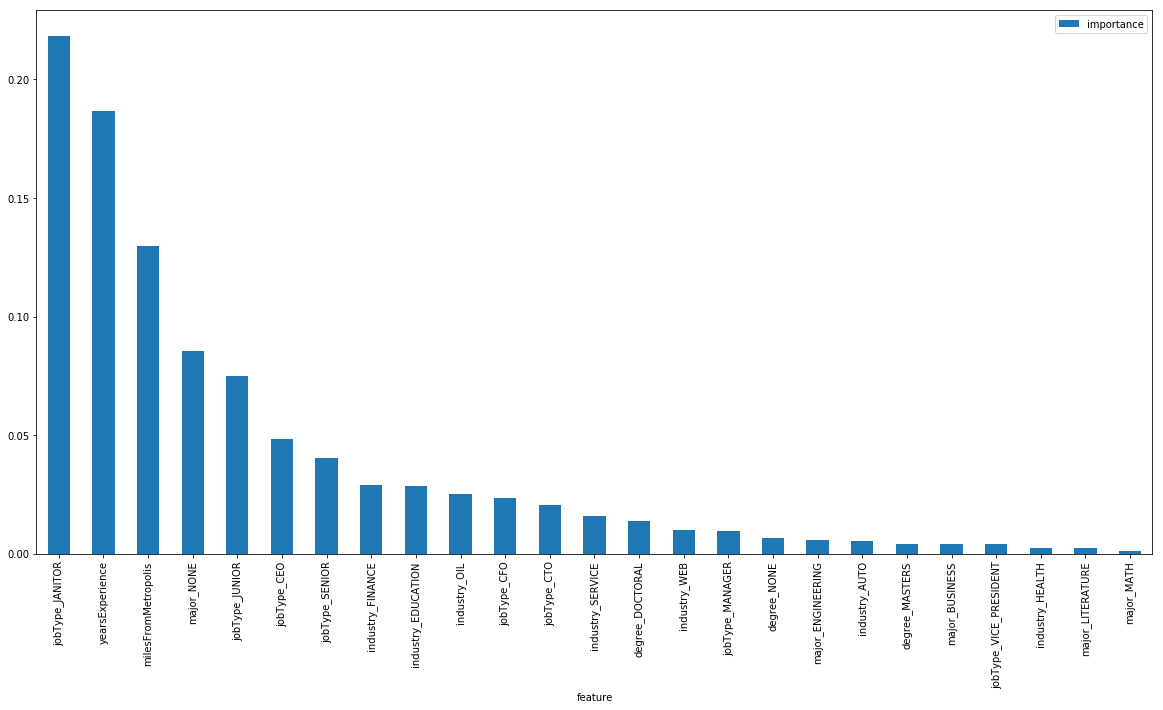

In [43]:
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

*Thank you for reviewing my project.*